In [1]:
import pandas as pd
import statistics as st

In [2]:
salary_df = pd.read_csv('DS1_C4_S7_Salary_Data_Concept.csv')
salary_df

,Intel,Microsoft,Adobe
0,125,159,142
1,144,188,106
2,115,125,130
3,137,164,119
4,128,97,82
5,121,221,122
6,126,244,135
7,118,268,82
8,116,149,101
9,112,203,131


In [3]:
#MEAn

In [4]:
intel_mean = salary_df["Intel"].mean()

In [5]:
micro_mean = salary_df["Microsoft"].mean()

In [6]:
adobe_mean = salary_df["Adobe"].mean()

In [7]:
com_mean = [intel_mean, micro_mean, adobe_mean ]
com_mean

[122.92, 171.8, 114.2]

In [8]:
intel_med = salary_df["Intel"].median()

In [9]:
micro_med = salary_df["Microsoft"].median()

In [10]:
adobe_med = salary_df["Adobe"].median()

In [11]:
com_med = [intel_med, micro_med, adobe_med ]
com_med

[121.0, 159.0, 119.0]

In [12]:
#mode

In [13]:
intel_mod = salary_df["Intel"].mode()
intel_mod[0]

112

In [14]:
micro_mod = salary_df["Microsoft"].mode()
micro_mod[0]

203

In [15]:
adobe_mod = salary_df["Adobe"].mode()
adobe_mod[0]

82

In [16]:
com_mod = [intel_mod[0], micro_mod[0], adobe_mod[0]]
com_mod

[112, 203, 82]

In [17]:
pd.DataFrame({"Mean":com_mean, "Median":com_med, "Mode":com_mod }, index = ["Intel","Microsoft","Adobe"])   #dictionary for mean, median and mode

,Mean,Median,Mode
Intel,122.92,121.0,112
Microsoft,171.80,159.0,203
Adobe,114.20,119.0,82


 # measures of dispersion



# standard deviation


In [26]:
intel_std = st.stdev(salary_df["Intel"])
intel_std

16.87187008010671

In [27]:
micro_std = st.stdev(salary_df["Microsoft"])
micro_std

49.903239707791855

In [28]:
Adobe_std = st.stdev(salary_df["Adobe"])
Adobe_std

19.276496915501358

In [29]:
std=[intel_std,micro_std,Adobe_std]
std

[16.87187008010671, 49.903239707791855, 19.276496915501358]

In [31]:
pd.DataFrame({"intel_std":intel_std, "micro_std":micro_std, "Adobe_std":Adobe_std},index = ["Intel","Microsoft","Adobe"])

,intel_std,micro_std,Adobe_std
Intel,16.87187,49.90324,19.276497
Microsoft,16.87187,49.90324,19.276497
Adobe,16.87187,49.90324,19.276497


In [24]:
intel = salary_df["Intel"].std()   
intel               #2 method to find standard deviation

16.87187008010671

# coefficient of variance

In [34]:
intel_cov = intel_std*100/intel_mean
intel_cov

13.7258949561558

In [23]:
micro_cov = micro_std*100/micro_mean
micro_cov

29.04728737356918

In [24]:
adobe_cov = Adobe_std*100/adobe_mean
adobe_cov

16.87959449693639

In [25]:
cof_var = [intel_cov,micro_cov,adobe_cov]
cof_var

[13.7258949561558, 29.04728737356918, 16.87959449693639]

In [26]:
pd.DataFrame({"Mean":com_mean, "Standard deviation":std, "coefficient of variance":cof_var}, index = ["Intel","Microsoft","Adobe"])

,Mean,Standard deviation,coefficient of variance
Intel,122.92,16.871870,13.725895
Microsoft,171.80,49.903240,29.047287
Adobe,114.20,19.276497,16.879594


In [ ]:
# how far the data is from the mean values that we can do with the help of coefficient of variance.
#the higher the coefficient of variance, which means that higher the distribution from the mean position.

In [37]:
Q1=salary_df["Intel"].quantile(0.25) #Calculating quartile 1
Q3=salary_df["Intel"].quantile(0.75) #Calculating quartile 3
IQR=Q3-Q1 #Calculating inter quartile range
UF=Q3+1.5*IQR #Calculating upper fence
LF=Q1-1.5*IQR 

In [38]:
UF

154.0

In [39]:
LF

90.0

In [28]:
#using for loop

In [5]:
#Iterating each column of dataframe
for company in salary_df.columns:
    LO=[]#Lower Outliers list
    UO=[]#Upper Outliers list
    company_series=pd.Series(salary_df[company]) #Converting each column values into pandas series
    
    Min=min(company_series) #Calculating minimum value
    Max=max(company_series) #Calculating maximum value
    Range=Max-Min #Calculating range
    
    Q1=company_series.quantile(0.25) #Calculating quartile 1
    Q3=company_series.quantile(0.75) #Calculating quartile 3
    IQR=Q3-Q1 #Calculating inter quartile range
    UF=Q3+1.5*IQR #Calculating upper fence
    LF=Q1-1.5*IQR #Calculating lower fence
    
    # The rule of 1.5 * IQR 
    # (IQR*1.5) = k 
    # Any point beyond Q3+k is an outlier 
    # Any point beyond Q1-k is an outlier 
    for i in salary_df[company]:
        if(i<LF):
            LO.append(i)
        if(i>UF):
            UO.append(i)
    
    #Storing all above the calculated minimum, maximum, range, Q1, Q3, IQR, 
    #upper fence, lower fence, and outliers into respective lists
    if(company=="Intel"):
        Intel=['Intel',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]]
    elif(company=="Microsoft"):
        Microsoft=['Microsoft',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]]
    else:
        Adobe=['Adobe',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]] 
        
col_names=['Company','Min','Max','Range','Q1','Q3','IQR','Lower Fence', 'Upper Fence','Outliers']
#Creating a new dataframe with all calculated values of 3 companies
d_data=pd.DataFrame([Intel, Microsoft,Adobe],columns=col_names) 
d_data

,Company,Min,Max,Range,Q1,Q3,IQR,Lower Fence,Upper Fence,Outliers
0,Intel,89,180,91,114.0,130.0,16.0,90.0,154.0,"[[89], [180]]"
1,Microsoft,97,300,203,138.0,200.0,62.0,45.0,293.0,"[[], [300]]"
2,Adobe,76,146,70,101.0,129.0,28.0,59.0,171.0,"[[], []]"


In [ ]:
#d_data.to_csv("outliers.csv", index=False)

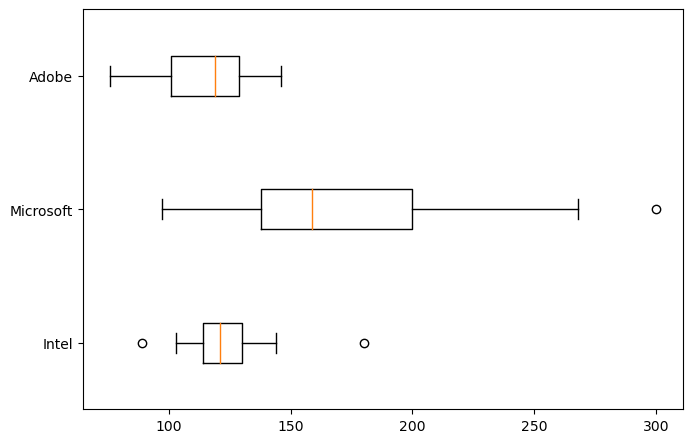

In [14]:
import matplotlib.pyplot as plt

#Separting each company's salary in different list
Intel_data=salary_df['Intel'].tolist()
Microsoft_data=salary_df['Microsoft'].tolist()
Adobe_data=salary_df['Adobe'].tolist()  
fig = plt.figure(figsize =(6, 4))                 #Setting figure size
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])           #it gives us places to draw the chart

#Creating boxplots of 3 groups of salaries
plt.boxplot([Intel_data,Microsoft_data,Adobe_data],vert=0)

#Setting y-axis label
ax.set_yticklabels(['Intel', 'Microsoft','Adobe'])

#Showing the final plot
plt.show()

In [7]:
#seaborn

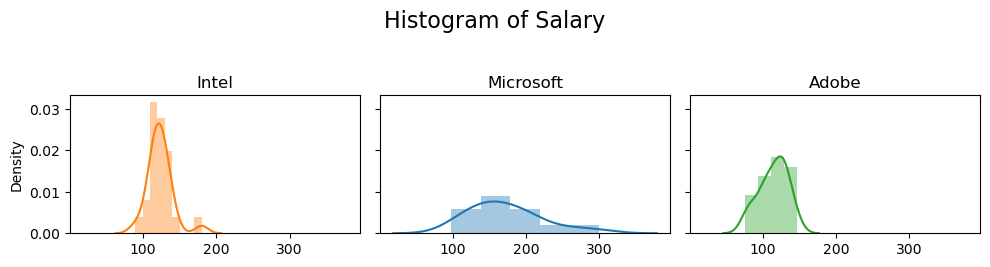

In [16]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Setting figure size and creating axes instance
fig, axes = plt.subplots(1, 3, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)

#Creating a list of various colors for different company plots
colors = ['tab:orange', 'tab:blue', 'tab:green']

cols=['Intel', 'Microsoft', 'Adobe']

#Setting Chart title
plt.suptitle('Histogram of Salary', y=1.05, size=16)

#Setting x and y axes limits
ax.set_xlim(10, 100) 
ax.set_ylim(0.0, 8.0)

#Iterating each axes instance and company name
for i, (ax, col) in enumerate(zip(axes.flatten(), cols)):
    x = salary_df.loc[:,col].tolist() #Converting each column into list type
    sns.distplot(x, ax=axes[i], color=colors[i]) #Drawing histogram with density plot
    ax.set_title(col) #Setting company name as subtitle to each sub figure

#Compacting all 3 companies subplots
plt.tight_layout();

#Showing the final plot
plt.show()    

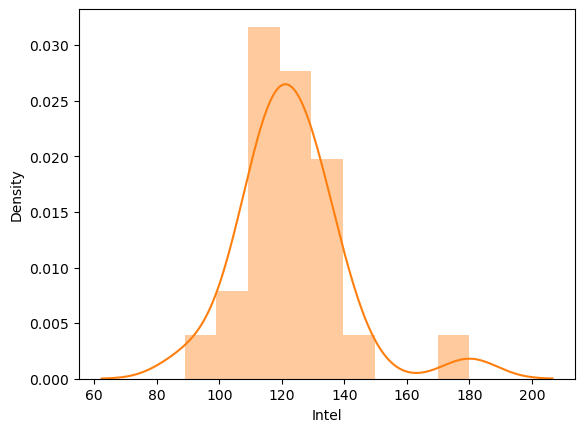

In [21]:
 sns.distplot(salary_df["Intel"], color="tab:orange");         #lepto-kurtic

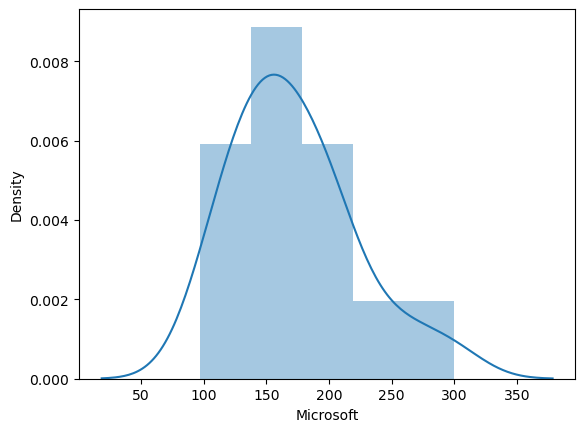

In [22]:
 sns.distplot(salary_df["Microsoft"], color="tab:blue");       #meso-kurtic

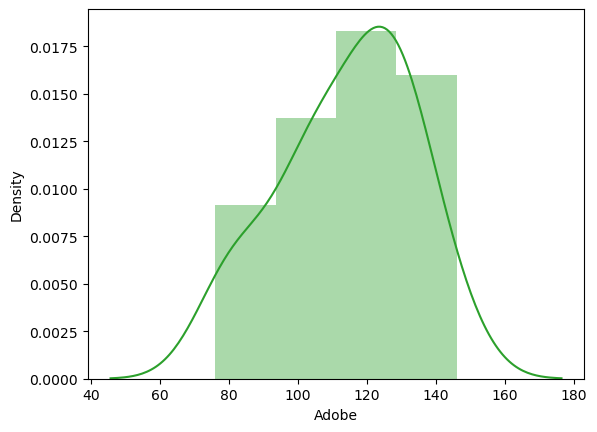

In [23]:
 sns.distplot(salary_df["Adobe"], color="tab:green");         #platy-kurtic

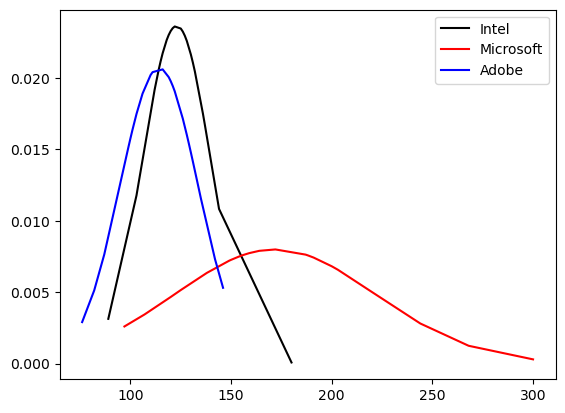

In [57]:
from scipy.stats import norm
plt.plot(sorted(salary_df["Intel"]), norm.pdf(sorted(salary_df["Intel"]), intel_mean, intel_std), color = "black", label ="Intel" )
plt.plot(sorted(salary_df["Microsoft"]), norm.pdf(sorted(salary_df["Microsoft"]), micro_mean, micro_std) ,color = "r",label = "Microsoft")
plt.plot(sorted(salary_df["Adobe"]), norm.pdf(sorted(salary_df["Adobe"]), adobe_mean, Adobe_std) ,color = "b",label="Adobe" )
plt.legend()
plt.show()

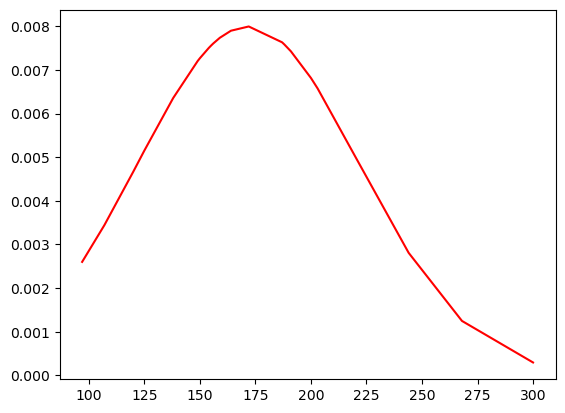

In [39]:
plt.plot(sorted(salary_df["Microsoft"]), norm.pdf(sorted(salary_df["Microsoft"]), micro_mean, micro_std) ,color = "r")

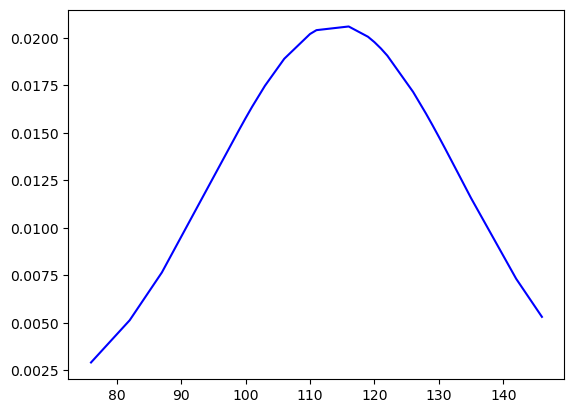

In [46]:
plt.plot(sorted(salary_df["Adobe"]), norm.pdf(sorted(salary_df["Adobe"]), adobe_mean, Adobe_std) ,color = "b")

# kurtosis

In [ ]:
#kurtosis indicate whether the frequency distribution is flat, normal and peaked 

In [58]:
from scipy.stats import kurtosis

In [59]:
kurtosis(sorted(salary_df["Intel"]))

3.728350010893812

In [60]:
kurtosis(sorted(salary_df["Microsoft"]))

0.2677156774812355

In [61]:
kurtosis(sorted(salary_df["Adobe"]))

-0.7502404479556861

In [63]:
cars = pd.read_csv('DS1_C4_S7_Mtcars_Data_Concept.csv')
cars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [64]:
cars.describe()                           #give summarized data

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


# correlation

Text(0.5, 1.0, '-0.8521619594266132')

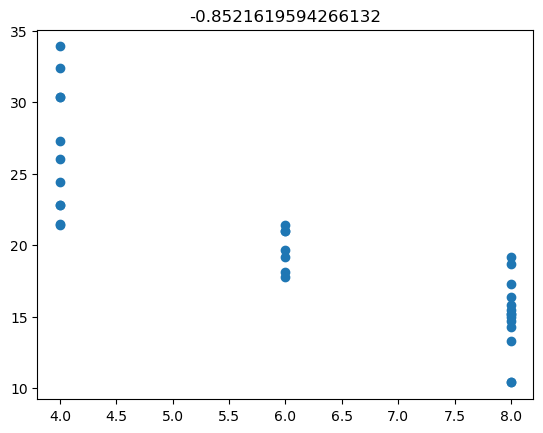

In [66]:
plt.scatter(cars["cyl"],cars["mpg"] )
plt.title(str(cars["cyl"].corr(cars["mpg"])))

Text(0.5, 1.0, '0.8324474527218194')

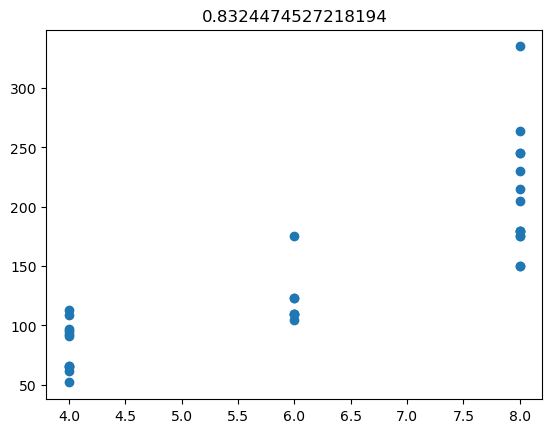

In [67]:
plt.scatter(cars["cyl"],cars["hp"] )
plt.title(str(cars["cyl"].corr(cars["hp"])))



Text(0.5, 1.0, '-0.7124406466973721')

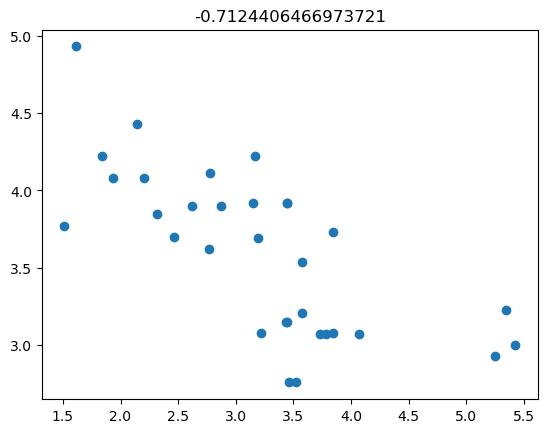

In [69]:
plt.scatter(cars["wt"],cars["drat"] )
plt.title(str(cars["wt"].corr(cars["drat"])))

Text(0.5, 1.0, '-0.6562492283380588')

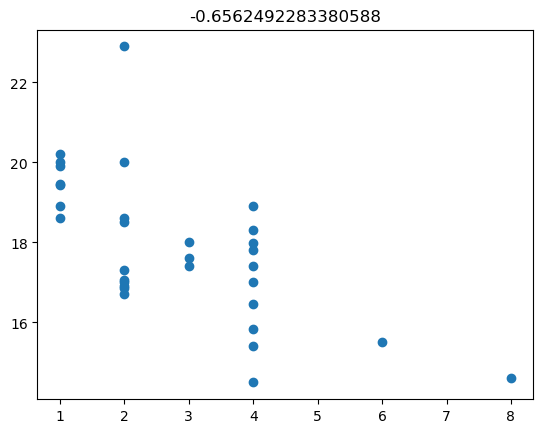

In [70]:
plt.scatter(cars["carb"],cars["qsec"] )
plt.title(str(cars["carb"].corr(cars["qsec"])))

Text(0.5, 1.0, '0.41868403392177816')

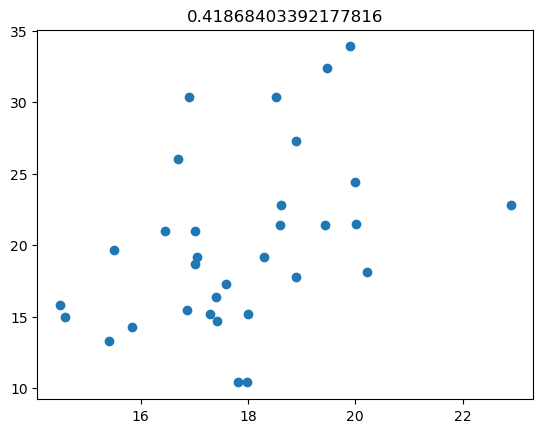

In [72]:
plt.scatter(cars["qsec"],cars["mpg"] )
plt.title(str(cars["qsec"].corr(cars["mpg"])))